# MODEL BUILDING FOR VEGETABLE PREDICTION

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fcab021718db442d88e1c8c185481f57 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TcFvaQsyIh-tmrps6Yks6NdeBnCT2E4bJqrMcCGNX6Jn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_fcab021718db442d88e1c8c185481f57.get_object(Bucket='fertilizers-donotdelete-pr-uvgsivosi2xndt', Key='Fertilizers_Recommendation_ System_For_Disease_ Prediction (2).zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
	unzip.extract(path)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [17]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [18]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [26]:
model= Sequential()

In [27]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.add(Dense(300,activation='relu'))

In [32]:
model.add(Dense(150,activation='relu'))

In [33]:
model.add(Dense(75,activation='relu'))

In [34]:
model.add(Dense(9,activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/tmp/wsuser/ipykernel_326/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
475/475 [==============================] - 94s 197ms/step - loss: 1.1930 - accuracy: 0.5856 - val_loss: 0.7590 - val_accuracy: 0.7155
Epoch 2/10
475/475 [==============================] - 93s 195ms/step - loss: 0.5992 - accuracy: 0.7844 - val_loss: 0.5227 - val_accuracy: 0.8132
Epoch 3/10
475/475 [==============================] - 93s 196ms/step - loss: 0.4478 - accuracy: 0.8418 - val_loss: 0.3675 - val_accuracy: 0.8659
Epoch 4/10
475/475 [==============================] - 93s 196ms/step - loss: 0.3555 - accuracy: 0.8767 - val_loss: 0.3083 - val_accuracy: 0.8852
Epoch 5/10
475/475 [==============================] - 92s 193ms/step - loss: 0.3036 - accuracy: 0.8921 - val_loss: 0.2779 - val_accuracy: 0.8996
Epoch 6/10
475/475 [==============================] - 92s 194ms/step - loss: 0.2613 - accuracy: 0.9088 - val_loss: 0.2372 - val_accuracy: 0.9166
Epoch 7/10
475/475 [==============================] - 94s 199ms/step - loss: 0.2412 - accuracy: 0.9117 - val_loss: 0.2364 - val_ac

In [37]:
model.save('model_vegetable.h5')

In [38]:
import numpy as np 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model= load_model('model_vegetable.h5')

In [40]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ff81e22a-09bf-49bd-b45a-c75606cd113b___NREC_B.Spot 1811.JPG")

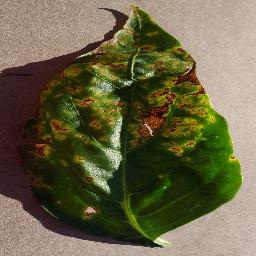

In [41]:
img

In [47]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ff81e22a-09bf-49bd-b45a-c75606cd113b___NREC_B.Spot 1811.JPG",target_size=(64,64))

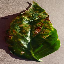

In [48]:
img

In [49]:
x=image.img_to_array(img)

In [50]:
x=np.expand_dims(x,axis=0)

In [51]:
y=np.argmax(model.predict(x),axis=1)

In [52]:
y

array([0])

In [53]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [54]:
index= ['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [55]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'

# IBM DEPLOYMENT FOR VEGETABLE

In [56]:
pip install watson-machine-learning-client

Note: you may need to restart the kernel to use updated packages.


In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
	"url":"https://eu-gb.ml.cloud.ibm.com",
	"apikey":"blyJyOvbJEy-LjIJWIAEeBen6voOl4Vk_BwhHIzLk4Nl"
}

In [58]:
client=APIClient(wml_credentials)

In [61]:
def guid_space_name(client,FERTILIZER_DEPLOYMENT):
	space=client.spaces.get_details()
	return(next(item for item in space['resources']if item['entity']['name']==FERTILIZER_DEPLOYMENT)['metadata']['id'])

In [62]:
space_uid=guid_space_name(client,'FERTILIZER_DEPLOYMENT')
print(space_uid)

bcea7c25-77c4-4a2e-8ae4-85d7fb01bc73


In [63]:
client.set.default_space(space_uid)

'SUCCESS'

In [64]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [65]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [66]:
!tar -zcvf Vegetable-classification.tgz model_vegetable.h5

model_vegetable.h5


In [67]:
model_details=client.repository.store_model(model='Vegetable-classification.tgz',
	meta_props={
               client.repository.ModelMetaNames.NAME:"CNN Vegetable Model Building",
		       client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
		       client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
                })

In [68]:
model_id = client.repository.get_model_id(model_details)

In [72]:
model_id

'e311b7d2-fe42-4aeb-9d13-930f40621a7c'

In [70]:
client.repository.download(model_id,'Vegetable.tar.gb')

Successfully saved model content to file: 'Vegetable.tar.gb'


'/home/wsuser/work/Vegetable.tar.gb'

In [71]:
ls

'Dataset Plant Disease'/   Vegetable-classification.tgz
 model_vegetable.h5        Vegetable.tar.gb
